In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [10]:
key = os.environ.get('AZURE_SEARCH_KEY', 'f55f384239734097a791f6f2236a1e7f')

In [32]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [33]:
results = search_images_bing(key, 'arara')
ims = results.attrgot('contentUrl')
len(ims)

150

In [36]:
tipos_passaro = 'azul', 'vermelha', 'caninde',
path = Path('passaro')

In [37]:
if not path.exists():
    path.mkdir()
    for o in tipos_passaro:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} arara')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [38]:
fns = get_image_files(path)
fns

(#442) [Path('passaro/azul/00000000.jpg'),Path('passaro/azul/00000001.jpg'),Path('passaro/azul/00000002.jpeg'),Path('passaro/azul/00000003.jpg'),Path('passaro/azul/00000004.jpg'),Path('passaro/azul/00000005.jpg'),Path('passaro/azul/00000006.jpg'),Path('passaro/azul/00000007.jpg'),Path('passaro/azul/00000008.jpg'),Path('passaro/azul/00000009.jpg')...]

In [39]:
failed = verify_images(fns)
failed

(#4) [Path('passaro/azul/00000003.jpg'),Path('passaro/azul/00000082.jpg'),Path('passaro/azul/00000147.jpg'),Path('passaro/caninde/00000144.jpg')]

In [40]:
failed.map(Path.unlink);

In [41]:
arara = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [42]:
dls = arara.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [44]:
arara = arara.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = arara.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


D:\Programas\Anaconda\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [45]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.836887,0.553590,0.218391,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.625681,0.274816,0.103448,00:55
1,0.535622,0.220562,0.068966,01:03
2,0.438219,0.212135,0.057471,01:04
3,0.396257,0.201369,0.057471,01:11


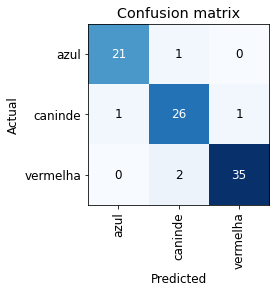

In [46]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [51]:
learn.export('arara.pkl')

In [52]:
path = Path()
path.ls(file_exts='.pkl')

(#3) [Path('arara.pkl'),Path('aula3101-p2.pkl'),Path('export.pkl')]

In [53]:
learn_inf = load_learner(path/'arara.pkl')

In [54]:
learn_inf.dls.vocab

['azul', 'caninde', 'vermelha']

In [55]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [56]:
img = PILImage.create(btn_upload.data[-1])

In [62]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
#with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [63]:
with out_pl: display(img.to_thumb(128,128))

In [59]:
pred,pred_idx,probs = learn_inf.predict(img)

In [60]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: vermelha; Probability: 0.9997')

In [61]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [64]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [65]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [66]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])